# 連立1階微分方程式を解く

2階以上の微分方程式を解くには，連立の1階微分方程式を解けば良い．

なので，とりあえず1階の微分方程式を解くプログラムを連立微分方程式を解けるように実装する．

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

In [2]:
# 前進オイラー法
def foward_euler(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])

    for i, nt in enumerate(t):
        if i == 0 : continue
        x = x + diff_eq(x, nt) * dt
        x_hist = np.append(x_hist, x)
    return x_hist

# ホイン法(2次のルンゲ・クッタ法)
def heun(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])

    for i, nt in enumerate(t):
        if i == 0 : continue
        k1 = dt * diff_eq(x, nt)
        k2 = dt * diff_eq(x+k1, nt+dt)
        x = x + (k1+k2)/2
        x_hist = np.append(x_hist, x)
    return x_hist

# 4次のルンゲ・クッタ法
def rk4(diff_eq, init_con, t):
    dt = (max(t)-min(t))/len(t)
    x = init_con
    x_hist = np.array([x])

    for i, nt in enumerate(t):
        if i == 0 : continue
        k1 = dt * diff_eq(x, nt)
        k2 = dt * diff_eq(x+k1/2, nt+dt/2)
        k3 = dt * diff_eq(x+k2/2, nt+dt/2)
        k4 = dt * diff_eq(x+k3  , nt+dt  )
        x = x + (k1 + 2*k2 + 2*k3 + k4) / 6
        x_hist = np.append(x_hist, x)
    return x_hist

In [3]:
# 常微分方程式のクラス
class ODE(object):
    def __init__(self, diff_eq, init_con):
        self.diff_eq  = diff_eq     # 解くべき方程式(関数)
        self.init_con = init_con    # 初期条件(配列)

    def solve(self, t_min, t_max, N, solver=odeint):    # solverはデフォルトではscipyの関数だが，自作関数に変えることもできる
        t = np.linspace(t_min, t_max, N)                # 時刻tの配列の生成
        x = solver(self.diff_eq, self.init_con, t)      # 方程式の解を計算する
        return t, x

In [4]:
# 3Dplot用の関数
def plot3D(x, y, z):
    fig = plt.figure(figsize=(10,4))
    sol = fig.add_subplot(1,1,1, projection='3d')
    sol.set_xlabel("$x$", fontsize=20, fontname='serif')
    sol.set_ylabel("$y$", fontsize=20, fontname='serif')
    sol.set_zlabel("$z$", fontsize=20, fontname='serif')
    sol.tick_params(axis='both', length=10, which='major')
    sol.tick_params(axis='both', length=5,  which='minor')
    sol.minorticks_on()
    sol.plot(x, y, z, 'b')
    sol.view_init(30, 45)
    plt.show()

# plot用の関数
def plot(x, y, x_range, y_range):
    fig = plt.figure(figsize=(10,4))
    sol = fig.add_subplot(1,1,1)
    sol.set_xlabel("$t$", fontsize=20, fontname='serif')
    sol.set_ylabel("$x$", fontsize=20, fontname='serif')
    sol.tick_params(axis='both', length=10, which='major')
    sol.tick_params(axis='both', length=5,  which='minor')
    sol.set_xlim(x_range)
    sol.set_ylim(y_range)
    sol.minorticks_on()
    sol.plot(x, y, 'r')
    plt.show()

In [5]:
# 解くべき方程式
# 連立でないバージョンとの違いはここだけ
# 第1引数がスカラでなくて配列になる

def lorenz_eq(v, t):    # ローレンツアトラクタ
    p = 10
    r = 28
    b = 8/3
    dxdt = -p*v[0] + p*v[1]
    dydt = -v[0]*v[2] + r*v[0] -v[1]
    dzdt = v[0]*v[1] -b*v[2]
    return np.array([dxdt, dydt, dzdt])

def diff_eq(v, t):  # ふつうの連立微分方程式
    dxdt = - v[0] - 2 * v[1]
    dydt = v[0] + v[1]
    return np.array([dxdt, dydt])


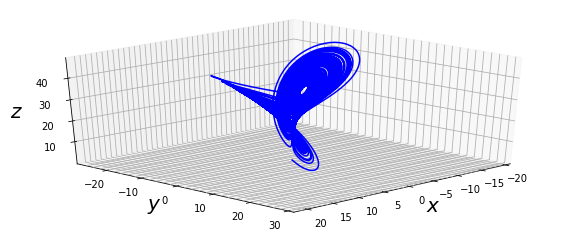

In [6]:
N = 100001                                # 分割数
min_t = 0                                # t の最小
max_t = 100                            # t の最大
initial_condition = np.array([0.1, 0.1, 0.1])  # 初期条件

ode_l = ODE(lorenz_eq, initial_condition)
t, v = ode_l.solve(min_t, max_t, N)
plot3D(v[:,0], v[:,1], v[:,2])

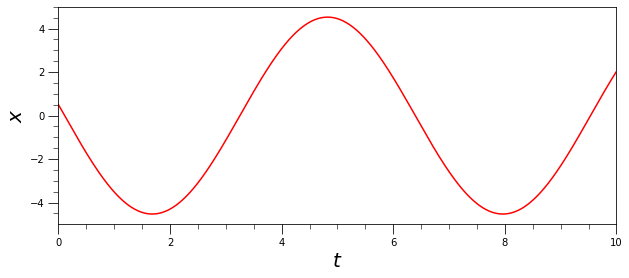

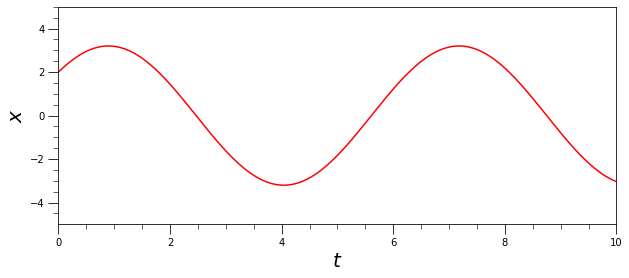

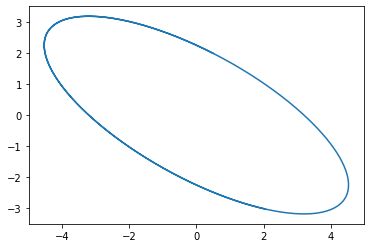

In [8]:
N = 100001                         # 分割数
min_t = 0                          # t の最小
max_t = 10                         # t の最大
initial_condition = np.array([0.5, 2])  # 初期条件
ode = ODE(diff_eq, initial_condition)
t, v = ode.solve(min_t, max_t, N)
plot(t, v[:,0], (min_t, max_t), (-5, 5) )
plot(t, v[:,1], (min_t, max_t), (-5, 5) )